## Emotic Dataset from COCO

In [52]:
## settings

# set parameters
# file_name_nsd_stim = './nsd/nsddata/experiments/nsd/nsd_stim_info_merged.csv'
# file_name_nsd_img = './nsd/nsddata_stimuli\stimuli/nsd/nsd_stimuli.hdf5'
file_name_nsd_stim = './nsd_stim_info_merged.csv'

# file_name_emotic_annot = './emotic_pami/Annotations/Annotations/Annotations.mat'
file_name_emotic_annot = './emotic_annotations.mat'

# load package
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import scipy.io

In [53]:
## get emotic data

# load data
data = scipy.io.loadmat(file_name_emotic_annot, simplify_cells=True)
emotic_data = data['train'] + data['test'] + data['val']
print(emotic_data[0].keys())
print(emotic_data[0]['person'].keys())

dict_keys(['filename', 'folder', 'image_size', 'original_database', 'person'])
dict_keys(['body_bbox', 'annotations_categories', 'annotations_continuous', 'gender', 'age'])


In [54]:
import pprint as pp
pp.pprint(emotic_data[0])
pp.pprint(len(emotic_data))


{'filename': 'COCO_val2014_000000562243.jpg',
 'folder': 'mscoco/images',
 'image_size': {'n_col': 640, 'n_row': 640},
 'original_database': {'info': {'annotations_id': 448867, 'image_id': 562243},
                       'name': 'mscoco'},
 'person': {'age': 'Adult',
            'annotations_categories': {'categories': array(['Disconnection', 'Doubt/Confusion'], dtype=object)},
            'annotations_continuous': {'arousal': 3,
                                       'dominance': 9,
                                       'valence': 5},
            'body_bbox': array([ 86,  58, 564, 628], dtype=uint16),
            'gender': 'Male'}}
23554


In [55]:
# print(len(emotic_data))

not_coco = [x for x in emotic_data if x['original_database']['name'] != 'mscoco']
print(len(not_coco))
pp.pprint(not_coco[0])

7058
{'filename': 'ebpsbjqzfhd7efh00i.jpg',
 'folder': 'emodb_small/images',
 'image_size': {'n_col': 623, 'n_row': 471},
 'original_database': {'name': 'emodb_small'},
 'person': [{'age': 'Kid',
             'annotations_categories': {'categories': array(['Pain', 'Sadness', 'Sensitivity', 'Suffering'], dtype=object)},
             'annotations_continuous': {'arousal': 7,
                                        'dominance': 4,
                                        'valence': 2},
             'body_bbox': array([ 47., 161., 616., 468.], dtype=float32),
             'gender': 'Female'},
            {'age': 'Adult',
             'annotations_categories': {'categories': array(['Sadness', 'Suffering', 'Sympathy'], dtype=object)},
             'annotations_continuous': {'arousal': 3,
                                        'dominance': 4,
                                        'valence': 2},
             'body_bbox': array([177.,  11., 570., 471.], dtype=float32),
             'gender': '

### filter mscoco data

In [56]:
emotic_coco_data = [x for x in emotic_data if x['original_database']['name']=='mscoco']
print(len(emotic_coco_data))
pp.pprint(emotic_coco_data[0])

16496
{'filename': 'COCO_val2014_000000562243.jpg',
 'folder': 'mscoco/images',
 'image_size': {'n_col': 640, 'n_row': 640},
 'original_database': {'info': {'annotations_id': 448867, 'image_id': 562243},
                       'name': 'mscoco'},
 'person': {'age': 'Adult',
            'annotations_categories': {'categories': array(['Disconnection', 'Doubt/Confusion'], dtype=object)},
            'annotations_continuous': {'arousal': 3,
                                       'dominance': 9,
                                       'valence': 5},
            'body_bbox': array([ 86,  58, 564, 628], dtype=uint16),
            'gender': 'Male'}}


In [57]:
# get COCO information and get arousal/valence/dominance
coco_id = [x['original_database']['info']['image_id'] for x in emotic_coco_data]
annot_id= [x['original_database']['info']['annotations_id'] for x in emotic_coco_data]
annotations = [x['person'] for x in emotic_coco_data] 

annotations[0:2]

[{'body_bbox': array([ 86,  58, 564, 628], dtype=uint16),
  'annotations_categories': {'categories': array(['Disconnection', 'Doubt/Confusion'], dtype=object)},
  'annotations_continuous': {'valence': 5, 'arousal': 3, 'dominance': 9},
  'gender': 'Male',
  'age': 'Adult'},
 {'body_bbox': array([485, 149, 605, 473], dtype=uint16),
  'annotations_categories': {'categories': 'Anticipation'},
  'annotations_continuous': {'valence': 6, 'arousal': 4, 'dominance': 7},
  'gender': 'Male',
  'age': 'Adult'}]

In [58]:
### caution: multiple people can be included in one image, multiple annotations can be included in one person ###
emotic_annotations = []
for annot in annotations:
    annot = [annot] if type(annot)==dict else annot

    valence = []; arousal = []; dominance = []
    for person in annot:
        person = person['annotations_continuous']
        person = [person] if type(person)==dict else person
        valence += [np.mean([x['valence'] for x in person])]
        arousal += [np.mean([x['arousal'] for x in person])]
        dominance += [np.mean([x['dominance'] for x in person])]
    emotic_annotations += [{ 'valence':valence, 'arousal':arousal, 'dominance':dominance}]

emotic_annotations = dict(zip(coco_id, emotic_annotations))


# define function
func_get_emotic_annot       = lambda coco_id, metric_type: np.mean(emotic_annotations[coco_id][metric_type])
func_get_emotic_annot_indiv = lambda coco_id, metric_type: emotic_annotations[coco_id][metric_type]

###################### USAGE #########################
id = coco_id[11]
valence = func_get_emotic_annot(id, 'valence')
arousal = func_get_emotic_annot(id, 'arousal')
dominance = func_get_emotic_annot(id, 'dominance')
print(valence, arousal, dominance)
######################################################


5.5 3.5 7.5


In [59]:
id = coco_id[11]; print(f"id: {id}")
print(func_get_emotic_annot_indiv(id, 'valence'))
print(f"id: {coco_id[19]}")
print(func_get_emotic_annot_indiv(coco_id[19], 'valence'))

print(func_get_emotic_annot_indiv(22683, 'valence'))


id: 122997
[5.0, 6.0]
id: 22683
[6.0]
[6.0]


In [60]:
pp.pprint(emotic_coco_data[11])

{'filename': 'COCO_val2014_000000122997.jpg',
 'folder': 'mscoco/images',
 'image_size': {'n_col': 640, 'n_row': 425},
 'original_database': {'info': {'annotations_id': 558850, 'image_id': 122997},
                       'name': 'mscoco'},
 'person': [{'age': 'Adult',
             'annotations_categories': {'categories': 'Engagement'},
             'annotations_continuous': {'arousal': 3,
                                        'dominance': 8,
                                        'valence': 5},
             'body_bbox': array([246,  63, 458, 380], dtype=uint16),
             'gender': 'Female'},
            {'age': 'Adult',
             'annotations_categories': {'categories': array(['Disconnection', 'Engagement', 'Peace'], dtype=object)},
             'annotations_continuous': {'arousal': 4,
                                        'dominance': 7,
                                        'valence': 6},
             'body_bbox': array([141,  47, 348, 343], dtype=uint16),
             

In [61]:
emotic_annotations[coco_id[0]]
emotic_annotations[coco_id[11]]

{'valence': [5.0, 6.0], 'arousal': [3.0, 4.0], 'dominance': [8.0, 7.0]}

In [62]:
emotic_annotations.keys() # coco_id


dict_keys([562243, 288841, 558171, 369575, 213009, 462955, 168683, 186198, 6590, 144608, 547457, 122997, 179164, 121006, 140322, 497759, 1966, 326320, 253959, 22683, 94268, 231589, 423647, 411109, 461715, 55276, 568202, 88609, 54277, 549216, 551481, 528657, 552054, 379034, 390644, 107239, 322698, 508538, 563727, 182785, 408190, 432683, 233526, 137029, 274108, 149755, 159225, 298949, 524651, 53608, 274642, 482172, 576031, 14103, 498702, 261879, 167028, 282027, 396793, 252375, 483078, 110392, 509626, 102225, 533291, 377160, 510791, 252801, 108758, 107072, 571264, 565387, 385280, 331832, 202476, 269588, 106596, 385744, 147012, 334220, 167397, 221625, 160480, 560391, 28642, 178283, 336858, 431405, 91159, 361895, 389772, 25461, 24571, 254011, 563349, 213135, 256276, 394058, 6692, 288223, 360548, 47801, 2842, 199865, 441828, 87604, 42312, 156763, 162177, 509403, 367519, 202906, 230061, 163435, 30299, 181929, 71223, 248403, 360271, 470053, 55516, 219935, 319521, 347263, 129510, 505818, 512854

In [63]:
## simple stats for emotic database

n_person = [len(func_get_emotic_annot_indiv(x, 'valence')) for x in emotic_annotations.keys()]

valence = [ func_get_emotic_annot(x,'valence') for x in emotic_annotations.keys()]
arousal = [ func_get_emotic_annot(x,'arousal') for x in emotic_annotations.keys()]
dominance = [ func_get_emotic_annot(x,'dominance') for x in emotic_annotations.keys()]

print("valence", pd.DataFrame(valence).describe())
print("arousal", pd.DataFrame(arousal).describe())
print("dominance", pd.DataFrame(dominance).describe())



valence                   0
count  16496.000000
mean       6.096221
std        1.155825
min        1.000000
25%        5.400000
50%        6.000000
75%        7.000000
max       10.000000
arousal                   0
count  16496.000000
mean       6.141998
std        1.853915
min        1.000000
25%        4.800000
50%        6.000000
75%        7.333333
max       10.000000
dominance                   0
count  16496.000000
mean       6.835635
std        1.464854
min        1.000000
25%        6.000000
50%        7.000000
75%        7.666667
max       10.000000


/home/dongho/anaconda3/envs/temp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


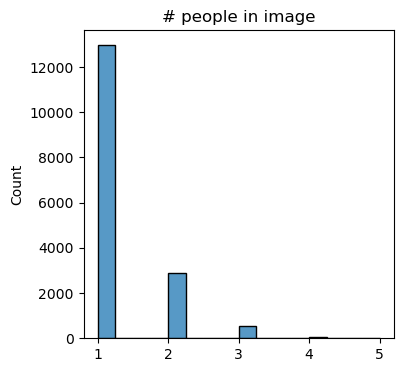

/home/dongho/anaconda3/envs/temp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dongho/anaconda3/envs/temp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dongho/anaconda3/envs/temp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


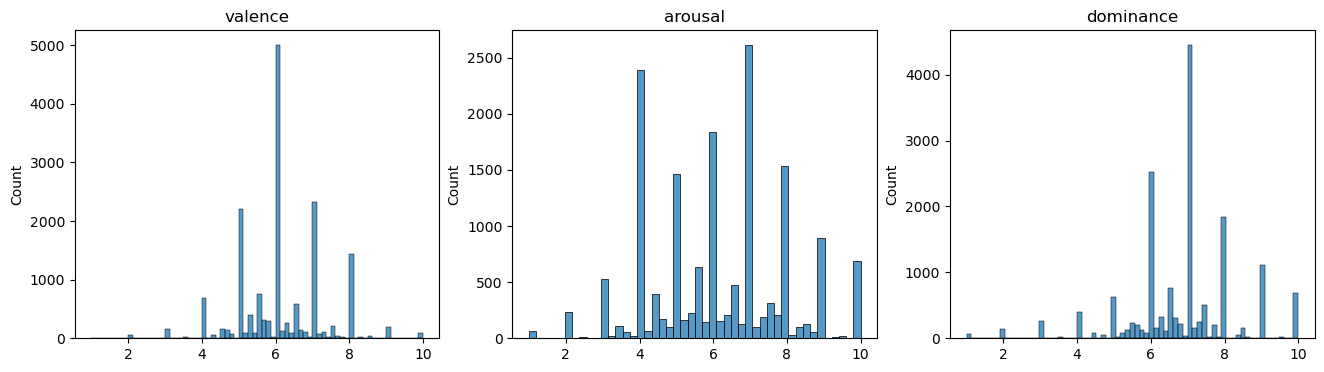

In [64]:
plt.figure(figsize=(4,4))
plt.title('# people in image')
sns.histplot(n_person)
plt.show()

plt.figure(figsize=(16,4))
plt.subplot(131); plt.title('valence'); sns.histplot(valence)
plt.subplot(132); plt.title('arousal'); sns.histplot(arousal)
plt.subplot(133); plt.title('dominance'); sns.histplot(dominance)
plt.show()

## NSD Data

In [65]:
## get NSD data
df = data = pd.read_csv(file_name_nsd_stim)
display(df)

nsd_id = df['Unnamed: 0'].values
nsd_cocoid = df['cocoId'].values
nsd_cocosplit = df['cocoSplit'].values
nsd_isshared = df['shared1000'].values


,Unnamed: 0,cocoId,cocoSplit,cropBox,loss,nsdId,flagged,BOLD5000,shared1000,subject1,...,subject5_rep2,subject6_rep0,subject6_rep1,subject6_rep2,subject7_rep0,subject7_rep1,subject7_rep2,subject8_rep0,subject8_rep1,subject8_rep2
0,0,532481,val2017,"(0, 0, 0.1671875, 0.1671875)",0.100000,0,False,False,False,0,...,0,0,0,0,0,0,0,0,0,0
1,1,245764,val2017,"(0, 0, 0.125, 0.125)",0.000000,1,False,False,False,0,...,0,0,0,0,13985,14176,28603,0,0,0
2,2,385029,val2017,"(0, 0, 0.125, 0.125)",0.000000,2,False,False,False,0,...,0,0,0,0,0,0,0,0,0,0
3,3,311303,val2017,"(0, 0, 0.16640625, 0.16640625)",0.125000,3,False,False,False,0,...,0,0,0,0,0,0,0,0,0,0
4,4,393226,val2017,"(0, 0, 0.125, 0.125)",0.133333,4,False,False,False,0,...,0,13720,22861,23023,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72995,72995,518071,train2017,"(0, 0, 0.125, 0.125)",0.000000,72995,False,False,False,0,...,0,0,0,0,0,0,0,6083,11650,26531
72996,72996,255930,train2017,"(0, 0, 0.125, 0.125)",0.125000,72996,False,False,False,0,...,0,0,0,0,0,0,0,10402,10434,10625
72997,72997,255934,train2017,"(0, 0, 0.1, 0.1)",0.000000,72997,False,False,False,0,...,0,0,0,0,0,0,0,0,0,0
72998,72998,518080,train2017,"(0.125, 0.125, 0, 0)",0.000000,72998,False,False,False,0,...,0,0,0,0,5585,11846,14495,0,0,0


In [82]:
df.index

RangeIndex(start=0, stop=73000, step=1)

In [66]:
func_get_emotic_annot_indiv(562243, 'valence')
# func_get_emotic_annot_indiv(25934, 'valence') # doesn't exist in NSD DataSet

[5.0]

## NSD && EMOTIC data

In [80]:
# list(emotic_annotations.keys()) # EMOTIC DataSet cocoId

In [68]:
# simple stats for NSD && EMOTIC data

####### variable settings
joint_cocoid = nsd_cocoid[np.isin(nsd_cocoid, list(emotic_annotations.keys()))]

# print(target_cocoid)
print("The Num of intersection between NSD and EMOTIC dataSet:", len(joint_cocoid))

The Num of intersection between NSD and EMOTIC dataSet: 9413


/home/dongho/anaconda3/envs/temp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


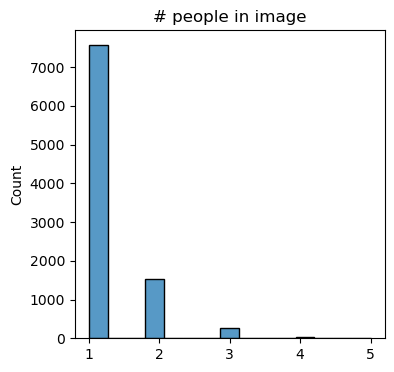

/home/dongho/anaconda3/envs/temp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dongho/anaconda3/envs/temp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dongho/anaconda3/envs/temp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


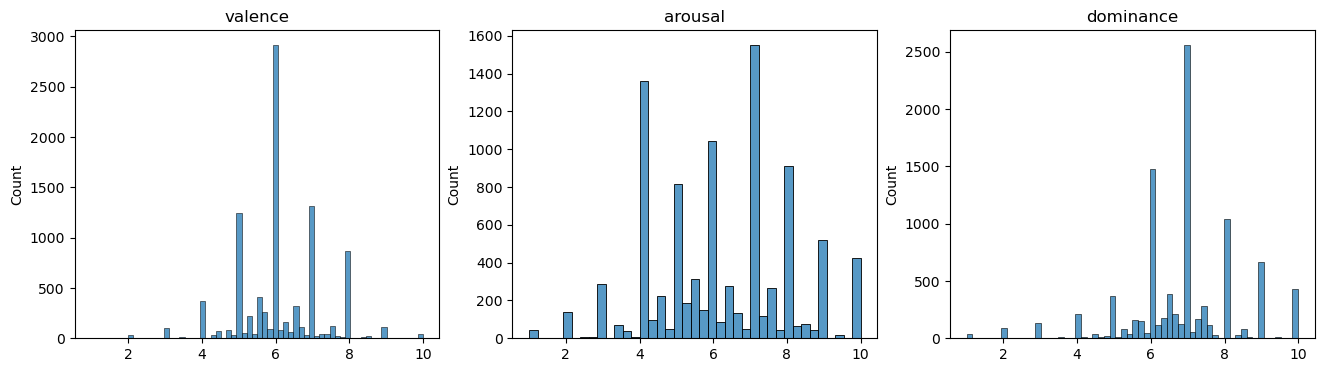

In [69]:
# get data and plot
n_person = [len(func_get_emotic_annot_indiv(coco_id, 'valence')) for coco_id in joint_cocoid]

valence = [ func_get_emotic_annot(coco_id,'valence') for coco_id in joint_cocoid]
arousal = [ func_get_emotic_annot(coco_id,'arousal') for coco_id in joint_cocoid]
dominance = [ func_get_emotic_annot(coco_id,'dominance') for coco_id in joint_cocoid]


plt.figure(figsize=(4,4))
plt.title('# people in image')
sns.histplot(n_person)
plt.show()

plt.figure(figsize=(16,4))
plt.subplot(131); plt.title('valence'); sns.histplot(valence)
plt.subplot(132); plt.title('arousal'); sns.histplot(arousal)
plt.subplot(133); plt.title('dominance'); sns.histplot(dominance)
plt.show()

## Split NSD & EMOTIC Dataset into Train or Test

1. TrainSet: NSD 데이터셋에서 개별적으로 보여준 것
2. TestSet: NSD 데이터셋에서 공통으로 보여준 것
3. 공통으로, 사람 한명 있는 데이터 사용
 - `len(person)==1`

In [78]:
train_cocoid = joint_cocoid[nsd_isshared]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 9413 but corresponding boolean dimension is 73000

In [81]:
target_cocoid = [coco_id for coco_id in joint_cocoid if len(func_get_emotic_annot_indiv(coco_id, 'valence')) == 1]
print("The number of joint pictures which reveals only one person:", len(target_cocoid))

The number of joint pictures which reveals only one person: 7569


In [98]:
# 만들고 싶은 것: target_cocoid의 id에 대응되면서 nsd_dataset에서 isshared=False인 애들을 가져오자.
# train_cocoid = [id for id in target_cocoid if ]
train_cocoid = nsd_cocoid[np.isin(nsd_cocoid, target_cocoid) &  ~nsd_isshared]
print(f"cocoid for train, #: {len(train_cocoid)}")
test_cocoid = nsd_cocoid[np.isin(nsd_cocoid, target_cocoid) &  nsd_isshared]
print(f"cocoid for test, #: {len(test_cocoid)}")


cocoid for train, #: 7457
cocoid for test, #: 112


In [102]:
train_valence = [func_get_emotic_annot(id, 'valence') for id in train_cocoid]
print(train_valence[0: 10], len(train_valence))

[8.0, 5.0, 7.0, 5.333333333333333, 6.0, 6.0, 7.0, 5.5, 7.0, 6.0] 7457
